# Project 2 - Ames Housing Data and Kaggle Challenge

## Problem Statement
In this project, we analyse the Ames Housing Dataset provided from the Ames Assessor's Office to determine what features affect the sales prices of houses in Ames, IA. Through the development of an appropriate regression model, the sales prices of houses will be predicted using various features (variables) of houses from the Ames Housing Dataset. 

Ultimately, we aim to provide a useful prediction model for real estate agents to predict house prices for their existing and potential clients, providing useful insights on the effect of different features on real estate prices through our model. 


## Executive Summary






This project examines data of two datasets on house prices in Ames, Iowa: one train dataset that covers the features of houses and their associated house prices, and one test dataset that covers the features of houses only. Through the use of the train dataset, we studied the relationship between various features of a house and their impact on the final sale price. An appropriate regression model (ridge regression model) for the prediction of house prices was chosen, which was eventually used to predict the sale prices of houses using the features from the test dataset. Finally, we studied and interpreted the ridge regression model that we used in the context of how certain features affect house prices.

Initial exploratory data analysis showed that the overall quality of a house, area-related variables (the above grade living area, and total basement square feet of a house) and the enclosed garage area of a house have moderate to high correlation with the sale price of a house. These features tend to have a positive impact on saleprices, as exhibited by the following trend: when values of any of these variables increase, the sale price tends to increase as well. Unlike positively-correlated variables, none of the negatively-correlated variables seems to have a huge negative impact on saleprice upon initial exploratory data analysis.

Another analysis of our variables was made after the selection of the ridge regression model for our house price prediction. After studying the coefficients of our variables/features after ridge regression, it appears that the location of the housing (the neighbourhood it is built in), the quality of the housing, the sale type of the listing, and the exterior of the house are all important determinants in the prediction of house prices in Ames. 

This is followed by recommendations for increasing the value of homes:
1. Improve the overall quality of the whole house through renovations
2. Dealing with any unfinished areas in a house, since any unfinished square footage reduces the value of a house.<br>
3. Improve the exterior of the house, particularly the roof style and material of the house (to hip style and wood shingles).<br>

Lastly, with the knowledge of how these important features can impact housing prices, real estate agents can pair this knowledge with the usage of our model to help their clients in the buying and selling of houses, providing them with better estimatation of real estate prices and explaining which features will help increase the value of their homes. 

Moving forward, we can choose to add more data of new houses sold in Ames to help the model make better price predictions. In addition, we can also choose to introduce data of houses sold outside of Ames, i.e. in other cities in Iowa, to help improve the model and eventually make useful price predictions for houses in the entire state of Iowa.

### Contents:
- [Problem Statement](#Problem-Statement)
- [Executive Summary](#Executive-Summary)
- [Data Import](#Data-Import)
- [Data Exploration and Cleaning](#Data-Exploration-and-Cleaning)
- [Setting Variables and Cleaning Outliers](#Setting-Variables-and-Cleaning-Outliers)
- [Data-cleaning For Test Data](#Data-cleaning-For-Test-Data)
- [More Exploratory Data Analysis](#More-Exploratory-Data-Analysis)
- [Encoding](#Encoding)
- [Feature Engineering and Feature Selection](#Feature-Engineering-and-Feature-Selection)
- [Modelling](#Modelling)
- [Selection of Model](#Selection-of-Model)
- [Interpretation of Chosen Model](#Interpretation-of-Chosen-Model)
- [Predictions for Kaggle](#Predictions-for-Kaggle)
- [Conclusion](#Conclusion)
- [Sources and References](#Sources-and-References)

## Data Import

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import math
import seaborn as sns
import scipy.stats as stats

import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from fancyimpute import IterativeImputer

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#Read in training file
train = pd.read_csv('./datasets/train.csv')
#Read in test data
test = pd.read_csv('./datasets/test.csv')

## Data Exploration and Cleaning

There are a total of two datasets: the train.csv and test.csv dataset. The train datasets contains values for all 79 housing features for each house, including their respective sales price. On the other hand, the test dataset does not contain a sales price column as it is for price prediction and validation purposes. Models built using train dataset will then be tested with the test dataset to evaluate the accuracy of our salesprice prediction on unseen data.

In [691]:
#preview train data
train.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [692]:
#preview test data
#test data does not have saleprice column
test.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [693]:
#rename the columns to lowercase and removing spaces:
train.columns = [x.lower().replace(' ', '_') for x in train.columns]
test.columns = [x.lower().replace(' ', '_') for x in test.columns]


In [694]:
#Drop ID and PID from train and test since property ID numbers should not affect sale price
house_train = train.drop(['id', 'pid'], axis=1)
house_test = test.drop(['id', 'pid'], axis=1)

In [695]:
#display the shape of both train and test data
#train has 79 columns while test has 78 due to the lack of 'saleprice' column
shape_train = house_train.shape
shape_test = house_test.shape
print(f"shape of house_train is {shape_train}, shape of house_test is {shape_test}")

shape of house_train is (2051, 79), shape of house_test is (879, 78)


### Cleaning of house's train dataset

In [696]:
#find the data type and no. of null values for each column
#there are lots of columns with null values
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ms_subclass      2051 non-null   int64  
 1   ms_zoning        2051 non-null   object 
 2   lot_frontage     1721 non-null   float64
 3   lot_area         2051 non-null   int64  
 4   street           2051 non-null   object 
 5   alley            140 non-null    object 
 6   lot_shape        2051 non-null   object 
 7   land_contour     2051 non-null   object 
 8   utilities        2051 non-null   object 
 9   lot_config       2051 non-null   object 
 10  land_slope       2051 non-null   object 
 11  neighborhood     2051 non-null   object 
 12  condition_1      2051 non-null   object 
 13  condition_2      2051 non-null   object 
 14  bldg_type        2051 non-null   object 
 15  house_style      2051 non-null   object 
 16  overall_qual     2051 non-null   int64  
 17  overall_cond  

In [697]:
#find the variables that have the high correlation with saleprice
house_train.corr()['saleprice'].sort_values(ascending = False).head(10)


saleprice         1.000000
overall_qual      0.800207
gr_liv_area       0.697038
garage_area       0.650270
garage_cars       0.648220
total_bsmt_sf     0.628925
1st_flr_sf        0.618486
year_built        0.571849
year_remod/add    0.550370
full_bath         0.537969
Name: saleprice, dtype: float64

Among the list of variables with highest correlation with saleprice, garage_area, garage_cars, total_bsmt_sf, garage_yr_blt have missing values.


### Dealing with Null Values

#### Garage columns

In [698]:
#seems like an item nonresponse:

#since this listing has a detached garage but no info for the rest of the columns
#will delete it (index 1712's housing)
garage_columns = ['garage_type', 'garage_yr_blt', 'garage_finish', 'garage_cars','garage_area', 
                  'garage_qual', 'garage_cond']
house_train[house_train['garage_area'].isnull()][garage_columns]

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond
1712,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [699]:
#drop index 1712's housing
house_train.drop(index = 1712, inplace=True)

In [700]:
#houses with no garage has null values for all garage-related columns
house_train[house_train['garage_type'].isnull()][garage_columns].head(4)

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond
28,NaN,NaN,NaN,0.0,0.0,NaN,NaN
53,NaN,NaN,NaN,0.0,0.0,NaN,NaN
65,NaN,NaN,NaN,0.0,0.0,NaN,NaN
79,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [701]:
#fill in 'None' for NaN for all categorical garage columns
categorical_garage = ['garage_type', 'garage_finish', 'garage_qual', 'garage_cond']
[house_train[column].fillna(str('None'), inplace = True) for column in categorical_garage]

#fill in 0 for NaN for all numerical garage columns 
numerical_garage = ['garage_cars', 'garage_area']
[house_train[column].fillna(0, inplace = True) for column in numerical_garage]
    
#dropping garage_yr_blt since it's meaningless for houses with no garage
house_train.drop(['garage_yr_blt'], axis=1, inplace = True)

#### Basement Columns

In [702]:
#doesn't seem like a non-response:
#just shows that this house doesn't have a basement
#hence the house for index 1327 will be kept
basement_columns = ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1', 
                    'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 
                    'bsmt_full_bath', 'bsmt_half_bath']
house_train[house_train['total_bsmt_sf'].isnull()][basement_columns]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [703]:
#houses with no basement has null values for all basement-related columns
house_train[house_train['bsmt_exposure'].isnull()][basement_columns].head(4)

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
12,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
114,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
146,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [704]:
#fill in 'None' for NaN for categorical basement columns
categorical_basement = ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 
                    'bsmtfin_type_2']
[house_train[column].fillna(str('None'), inplace = True) for column in categorical_basement]

#fill in 0 for NaN for numerical basement columns 
numerical_basement = ['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 
                      'bsmt_full_bath', 'bsmt_half_bath']
[house_train[column].fillna(0, inplace = True) for column in numerical_basement]

[None, None, None, None, None, None]

#### Masonry Veneer Columns

In [705]:
#houses with no masonry has null values for all masonry-related columns
mas_columns = ['mas_vnr_type', 'mas_vnr_area']
mas_mask = house_train['mas_vnr_type'].isnull() & house_train['mas_vnr_area'].isnull()
print(house_train[mas_mask][mas_columns].head())

    mas_vnr_type  mas_vnr_area
22           NaN           NaN
41           NaN           NaN
86           NaN           NaN
212          NaN           NaN
276          NaN           NaN


In [706]:
#both masonry columns have the same number of null values
print(f"Number of null values in mas_vnr_type is {house_train[house_train['mas_vnr_type'].isnull()].shape[0]}.")
print(f"Number of null values in mas_vnr_area is {house_train[house_train['mas_vnr_area'].isnull()].shape[0]}.")

Number of null values in mas_vnr_type is 22.
Number of null values in mas_vnr_area is 22.


In [707]:
#fill in 'None' for NaN for mas_vnr_type column
house_train['mas_vnr_type'].fillna(str('None'), inplace = True)

#fill in 0 for NaN for mas_vnr_area column 
house_train['mas_vnr_area'].fillna(0, inplace = True)

#### Alley, Fireplace, Fence, Pool and Miscellaneous Columns

In [708]:
#there are only 9 houses with pools: this corresponds to only 9 filled values for pool_ac
number_pools = house_train[house_train['pool_area'] > 0].shape[0]
number_poolqc = house_train[house_train['pool_qc'].isna() != True ].shape[0]
print(f"There are only {number_pools} houses with pools, which corresponds to {number_poolqc} existing pool quality ratings.")

There are only 9 houses with pools, which corresponds to 9 existing pool quality ratings.


In [709]:
#there are 1051 houses with fireplaces: this corresponds to only 1051 filled values for fireplace_qu
number_pools = house_train[house_train['fireplaces'] > 0].shape[0]
number_poolqc = house_train[house_train['fireplace_qu'].isna() != True ].shape[0]
print(f"There are only {number_pools} houses with fireplaces, which corresponds to {number_poolqc} existing fireplace quality ratings.")

There are only 1051 houses with fireplaces, which corresponds to 1051 existing fireplace quality ratings.


In [710]:
#these NaN values means house has no pool or/and fireplace
#should convert from NaN to None (to convert to dummy variables in the later part)
pool_fireplace = ['pool_qc', 'fireplace_qu']
house_train[pool_fireplace].head()

,pool_qc,fireplace_qu
0,NaN,NaN
1,NaN,TA
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [711]:
#check for other NaN values from alley, fence and miscellaneous
#these NaN values means house has no alley, fence, and/or miscellaneous feature
#should convert from NaN to None (to convert to dummy variables in the later part)
other_columns = ['alley', 'fence', 'misc_feature']
house_train[other_columns].head(5)

,alley,fence,misc_feature
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [712]:
#fill NaN with None for all 5 columns
all_columns = ['alley', 'fireplace_qu', 'pool_qc', 'misc_feature', 'fence']
[house_train[column].fillna(str('None'), inplace = True) for column in all_columns]
    
#check if all empty values are filled
print(house_train[all_columns].isnull().sum())

alley           0
fireplace_qu    0
pool_qc         0
misc_feature    0
fence           0
dtype: int64


#### Lot frontage

In [713]:
#330 lot_frontage values are missing. 
house_train[house_train['lot_frontage'].isnull()].shape[0]

330

In [714]:
#to fill up null values, iterativeimputer will be used
lot_frontage_imputed = house_train[['lot_frontage', 'lot_area']].copy(deep=True)

# Initialize IterativeImputer
mice_imputer = IterativeImputer()
lot_frontage_imputed.iloc[:, :] = mice_imputer.fit_transform(house_train[['lot_frontage', 'lot_area']])

#Copy lot_frontage new and rounded up values to house_train
house_train['lot_frontage'] = lot_frontage_imputed['lot_frontage'].round()

In [715]:
#double check if there are any more null values
house_train.isnull().sum().value_counts(ascending=False)

0    78
dtype: int64

## Setting Variables and Cleaning Outliers

### Nominal/Ordinal Numerical Integers

Since the test and train datasets have several variables that are nominal or ordinal but are stored as integers/floats, we will check if these variables should be stored as integers or objects. 

In [716]:
#create function to plot boxplot
def plot_boxplot(dataframe, column, target, title):
    plt.figure(figsize =(12,8))
    sns.boxplot(x=column, y=target, data=dataframe)   
    plt.xlabel(column, fontsize = 12)
    plt.ylabel(target, fontsize = 12)
    plt.title(title, fontsize = 12)

#### MS SubClass

In [717]:
#MS SubClass is stored as an integer
#but it is a nominal variable as described in data dictionary
house_train['ms_subclass'].dtype

dtype('int64')

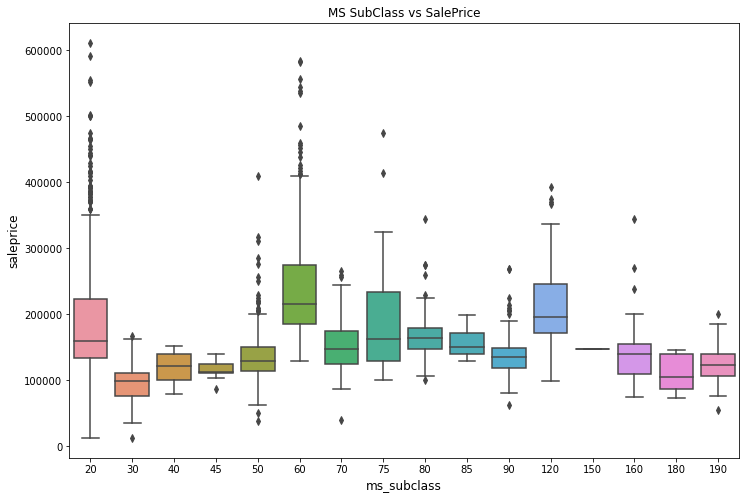

In [718]:
#Plot boxplot of MS SubClass vs Sale Price
plot_boxplot(house_train, 'ms_subclass', 'saleprice', 'MS SubClass vs SalePrice')

Looking at the boxplot above, it seems like ms_subclass is definitely a categorical (nominal) variable as it has categories that are very distinctively shown on the boxplot. The variable ms_subclass should be stored as an object instead.

#### Overall Quality

In [719]:
#Overall Quality is stored as an integer
#but it is a ordinal variable as described in data dictionary
house_train['ms_subclass'].dtype

dtype('int64')

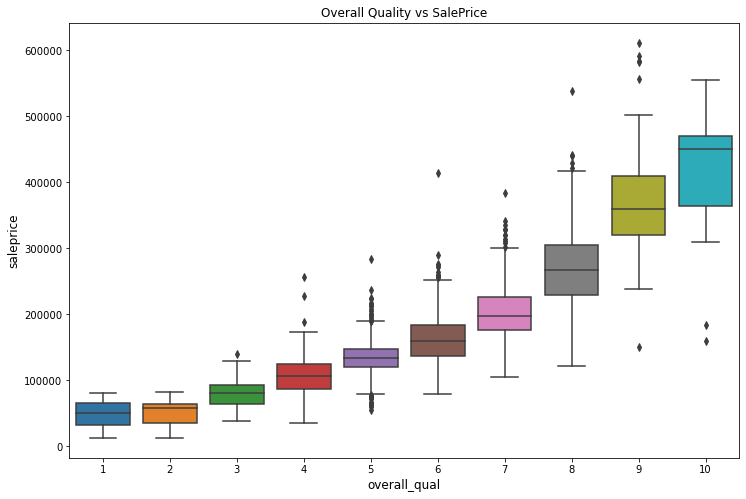

In [720]:
#Plot boxplot of overall quality vs Sale Price
plot_boxplot(house_train, 'overall_qual', 'saleprice', 'Overall Quality vs SalePrice')

Looking at the boxplot above, it seems like overall_qual is also definitely a categorical (ordinal) variable as it has categories that are very distinctively shown on the boxplot. With 1 being the lowest quality and 10 being the highest quality, it seems that each quality rank corresponds to their own respective ranked value. 

Since this variable is already set with their respective ranked integers, the variable overall_qual will continue to be kept as an integer, but be viewed as a categorical variable.

#### Overall Condition

In [721]:
#Overall condition is stored as an integer
#but it is a ordinal variable as described in data dictionary
house_train['ms_subclass'].dtype

dtype('int64')

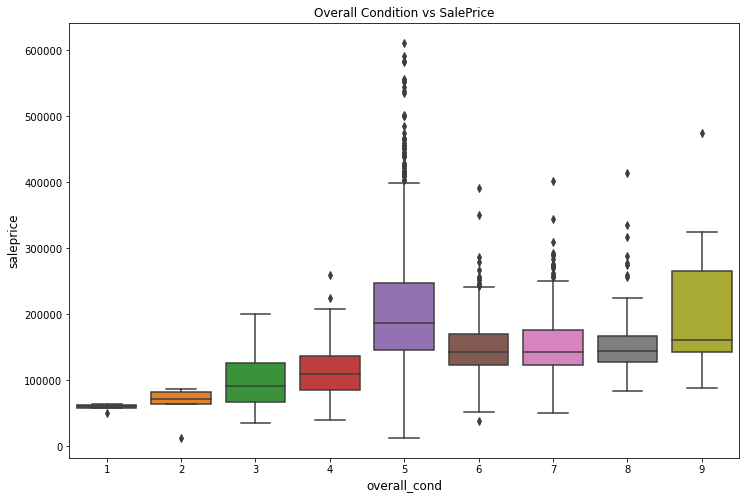

In [722]:
#Plot boxplot of overall condition vs Sale Price
plot_boxplot(house_train, 'overall_cond', 'saleprice', 'Overall Condition vs SalePrice')

It appears that overall_cond is also definitely a categorical (ordinal) variable as it has different categories that are very distinctively shown on the boxplot. With 1 being the lowest condition (very poor condition) and 10 being the best condition (very excellent condition), it seems that each ranked condition corresponds to their own respective ranked value. 

Since this variable's values is already ordered with their respective integers, the variable overall_qual will also continue to be kept as an integer (but will be viewed as a categorical variable).

### Other Numerical Variables

Besides the aforementioned variables, we should also check if any of the other numerical features from the dataset are also categorical in nature.

In [723]:
house_train.dtypes.value_counts()

object     42
int64      26
float64    10
dtype: int64

In [724]:
#to plot scatter plots for numerical variables
def numerical_scatter(dataframe, columns, target, num_cols):
    fig = plt.figure(figsize=(10*num_cols,7*round(len(columns)/num_cols)))
    for col_number, col_name in enumerate(columns):   
        fig.add_subplot(math.ceil(len(columns)/num_cols), num_cols, col_number + 1)
        plt.scatter(dataframe[col_name], dataframe[target])
        plt.xlabel(col_name, fontsize = 15)
        plt.ylabel(target, fontsize = 15)

In [725]:
#store all columns that are float or int types
float_int_columns = house_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [726]:
#remove the 3 aforementioned variables as they are not numerical data
not_numerical = ['ms_subclass', 'overall_qual', 'overall_cond']
[float_int_columns.remove(x) for x in not_numerical if x in float_int_columns]

[None, None, None]

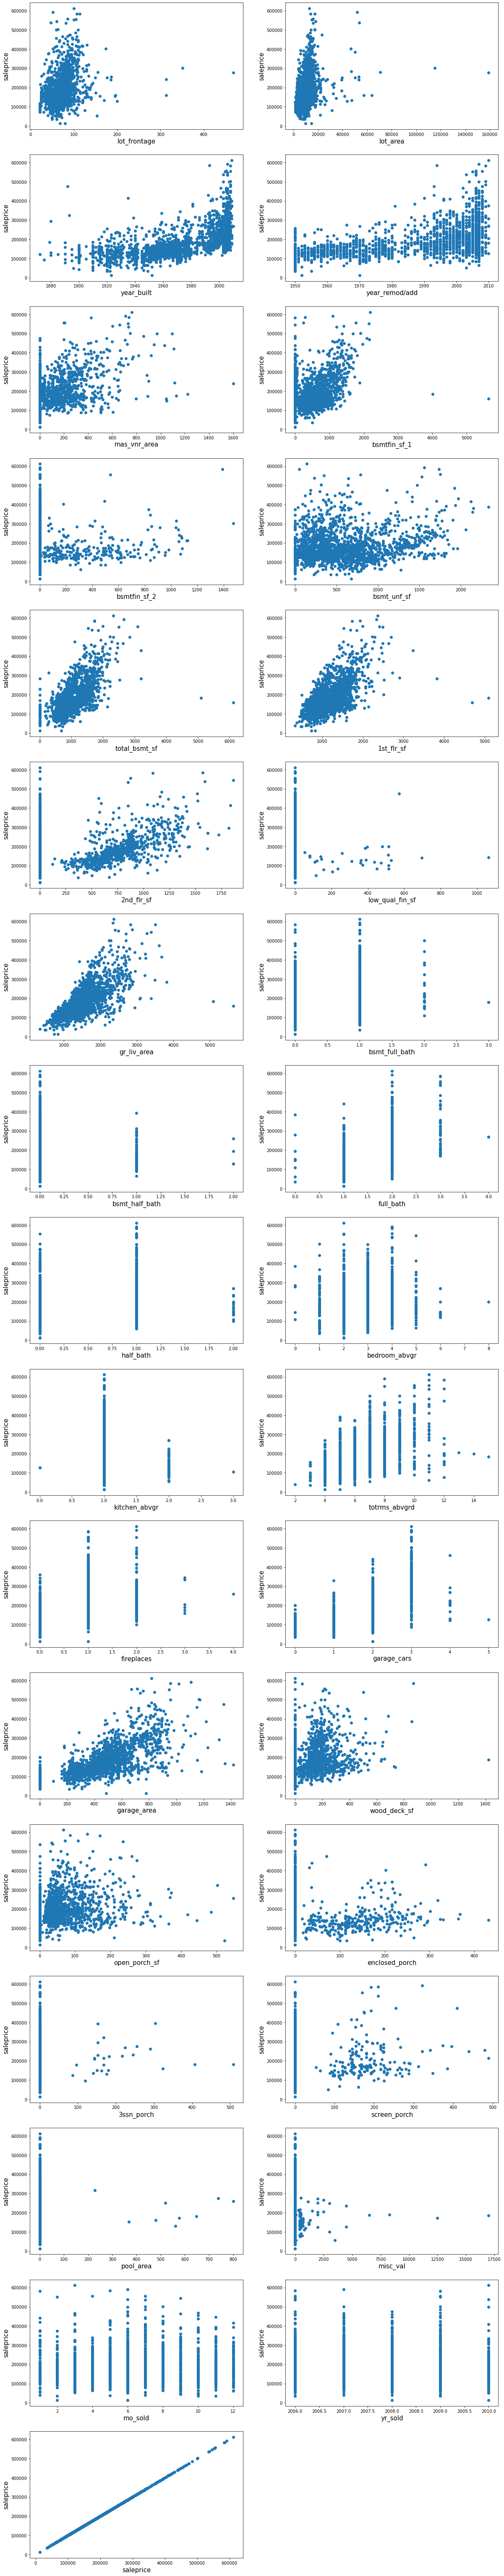

In [727]:
#plot all current numerical columns
numerical_scatter(house_train, float_int_columns, 'saleprice', 2)

<b>Numerical Versus Categorical</b>:<br>
Many distributions are continuous (e.g. lot_frontage, lot_area, bsmt_unf_sf) while some distributions are discrete (e.g. bsmt_full_bath, bsmt_half_bath, full_bath). 

However, some variables plotted above actually have categorical characteristics, specifically <b>'mo_sold'</b>, and <b>'yr_sold'</b>. These variables will be plotted using a box plot to check if they should be stored as numerical or categorical variables.

<b> Outliers</b>:<br>
It appears that there are outliers on the scatter plots of certain variables against saleprice, such as <b>'lot_area', 'lot_frontage',</b> and <b>'gr_liv_area'</b>. We will address that in the section under [Outliers](#Outliers).

#### Month Sold, and Year Sold

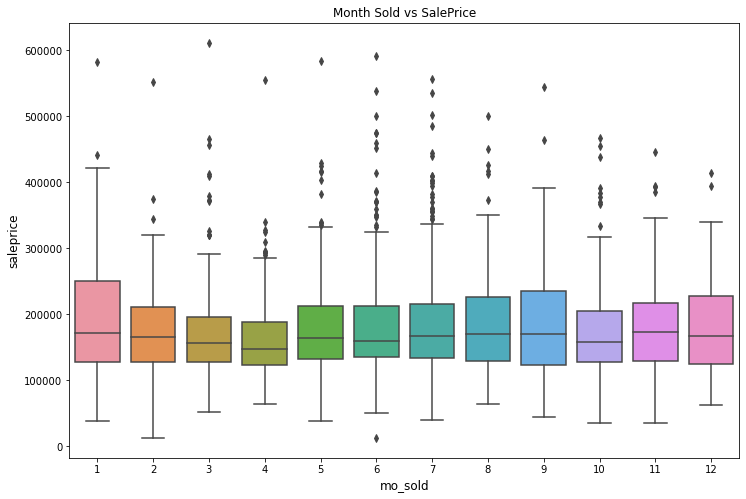

In [728]:
#plot boxplot of month sold vs saleprice
plot_boxplot(house_train, 'mo_sold', 'saleprice', 'Month Sold vs SalePrice')

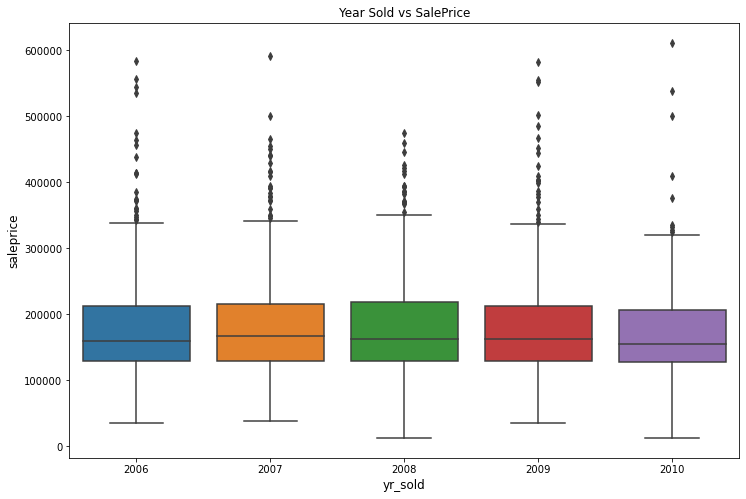

In [729]:
#plot boxplot of year sold vs saleprice
plot_boxplot(house_train, 'yr_sold', 'saleprice', 'Year Sold vs SalePrice')

As seen above, despite being stored as integers/floats, both mo_sold and yr_sold appear as categorical variables (nominal) on the boxplot, with each month or year shown distinctively. 
Hence, both variables, mo_sold and yr_sold, will be converted to objects instead.

#### Convert to Objects

In [730]:
#combine all variables that should be converted to strings/objects
convert_to_objects = ['ms_subclass', 'mo_sold', 'yr_sold']

#convert these variables to strings in both train and test datasets
house_train[convert_to_objects] = house_train[convert_to_objects].astype(str)
house_test[convert_to_objects] = house_test[convert_to_objects].astype(str)

In [731]:
#double check if new objects are added
house_train.dtypes.value_counts()

object     45
int64      23
float64    10
dtype: int64

#### Numerical Columns

In [732]:
#combine all 5 categorical columns (that were stored as int/floats)
not_numerical = not_numerical + ['mo_sold', 'yr_sold']
not_numerical

['ms_subclass', 'overall_qual', 'overall_cond', 'mo_sold', 'yr_sold']

In [733]:
#combine all numerical columns together
numerical_columns = [col for col in float_int_columns if col not in not_numerical]

### Outliers

We will also check for any potential outliers that should be removed from the train dataset before modelling.

In [734]:
#create function for scatterplots to check for outliers
def scatter_plot(dataframe, column_1, column_2, title):
    plt.figure(figsize=(10,6))
    sns.scatterplot(house_train[column_1], house_train[column_2])
    plt.title(title)

#### Above Ground/Grade Living Area

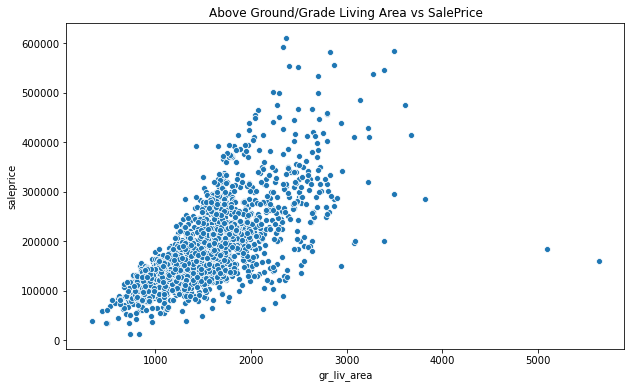

In [736]:
#check for any outliers in Above Ground/Grade Living Area vs Saleprice
scatter_plot(house_train, 'gr_liv_area', 'saleprice', 'Above Ground/Grade Living Area vs SalePrice')

Plotting <b>above grade living area</b> (gr_liv_area) against <b>saleprice</b>, there are 2 extreme outliers (all houses above 4000 square feet) that should be removed from the train data set.

In [737]:
#drop the gr_liv_area outliers
liv_area_outliers = house_train[house_train['gr_liv_area'] > 4000]
house_train.drop(liv_area_outliers.index, inplace=True)

#### Lot Area

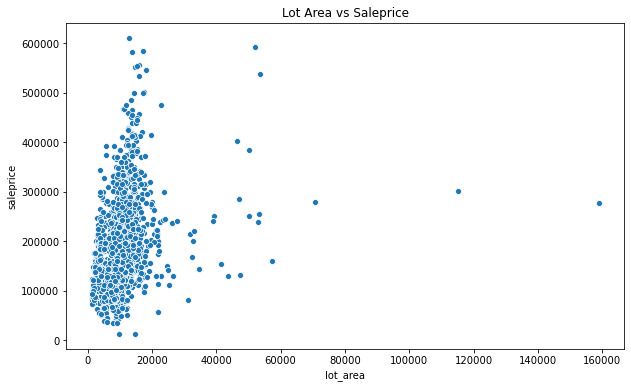

In [738]:
#check for any outliers in lot area vs sale price
scatter_plot(house_train, 'lot_area', 'saleprice', 'Lot Area vs Saleprice')

Plotting <b>lot area</b> (lot_area) against <b>saleprice</b>, there are 2 extreme outliers (all houses above 100000 lot area) that should be removed from the train data set.

In [739]:
#drop the lot_area outliers
lot_area_outliers = house_train[house_train['lot_area'] > 100000]
house_train.drop(lot_area_outliers.index, inplace=True)

#### Lot Frontage

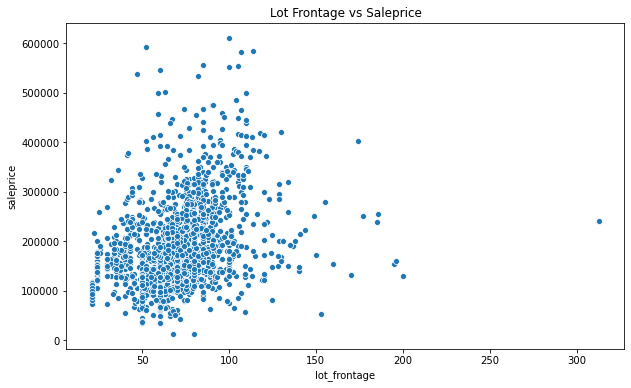

In [740]:
#check for any outliers in lot frontage vs sale price
scatter_plot(house_train, 'lot_frontage', 'saleprice', 'Lot Frontage vs Saleprice')

Plotting <b>lot frontage</b> (lot_frontage) against <b>saleprice</b>, there is 1 extreme outlier (above 300 lot frontage) that should be removed from the train data set.

In [741]:
#drop the lot_frontage outliers
lot_front_outliers = house_train[house_train['lot_frontage'] > 300]
house_train.drop(lot_front_outliers.index, inplace=True)

## Data-cleaning For Test Data

In [742]:
#find the data type and no. of null values for each column in test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               879 non-null    int64  
 1   pid              879 non-null    int64  
 2   ms_subclass      879 non-null    int64  
 3   ms_zoning        879 non-null    object 
 4   lot_frontage     719 non-null    float64
 5   lot_area         879 non-null    int64  
 6   street           879 non-null    object 
 7   alley            58 non-null     object 
 8   lot_shape        879 non-null    object 
 9   land_contour     879 non-null    object 
 10  utilities        879 non-null    object 
 11  lot_config       879 non-null    object 
 12  land_slope       879 non-null    object 
 13  neighborhood     879 non-null    object 
 14  condition_1      879 non-null    object 
 15  condition_2      879 non-null    object 
 16  bldg_type        879 non-null    object 
 17  house_style     

Columns with null values from test data are similar to that of train data. Hence we will apply the same data-cleaning methods to the test dataset.
However, there's an extra column with null values that only test data has, which is the <b>'electrical'</b> column. The null value from 'electrical' will be dealt with in this section.

#### Garage columns

In [743]:
#fill in 'None' for NaN for categorical garage columns
[house_test[column].fillna(str('None'), inplace = True) for column in categorical_garage]

#fill in 0 for NaN for numerical garage columns 
[house_test[column].fillna(0, inplace = True) for column in numerical_garage]
    
#dropping garage_yr_blt since it's meaningless for houses with no garage
house_test.drop(['garage_yr_blt'], axis=1, inplace = True)

#### Basement columns

In [744]:
#fill in 'None' for NaN for categorical basement columns
[house_test[column].fillna(str('None'), inplace = True) for column in categorical_basement]

#fill in 0 for NaN for numerical basement columns 
[house_test[column].fillna(0, inplace = True) for column in numerical_basement]

[None, None, None, None, None, None]

#### Masonry Veneer columns

In [745]:
#fill in 'None' for NaN for mas_vnr_type column
house_test['mas_vnr_type'].fillna(str('None'), inplace = True)

#fill in 0 for NaN for mas_vnr_area column 
house_test['mas_vnr_area'].fillna(0, inplace = True)

#### Alley, Fireplace, Pool, Misc, Fence columns

In [746]:
#fill NaN with None for all 5 columns
[house_test[column].fillna(str('None'), inplace = True) for column in all_columns]
    
#check if all empty values are filled
print(house_test[all_columns].isnull().sum())

alley           0
fireplace_qu    0
pool_qc         0
misc_feature    0
fence           0
dtype: int64


#### Lot frontage column

In [747]:
#using iterativeimpute to fill in null values for lot_frontage
lot_frontage_imputed_2 = house_test[['lot_frontage', 'lot_area']].copy(deep=True)

#transformed from train's mice_imputer
lot_frontage_imputed_2.iloc[:, :] = mice_imputer.transform(house_test[['lot_frontage', 'lot_area']])

#Copy lot_frontage new and rounded up values to house_test
house_test['lot_frontage'] = lot_frontage_imputed_2['lot_frontage'].round()

#### Electrical

Since there's an extra column (electrical) with null values that only test data has, we will have to replace the null value too. Due to electrical column's categorical nature, the mode of the 'electrical' column from the train dataset will be used to replace the null value from this test dataset.

In [748]:
#check index of null in electrical
house_test[house_test['electrical'].isnull()][['electrical']]

,electrical
635,NaN


In [749]:
#use mode of train's electrical column to replace the null value
house_test['electrical'].fillna(house_train['electrical'].mode()[0], inplace = True)

In [750]:
#check for null_values
house_test.isnull().sum().value_counts()

0    77
dtype: int64

### Exporting Dataset with no null values

In [751]:
house_train.to_csv('./datasets/house_train_clean.csv', index=False)
house_test.to_csv('./datasets/house_test_clean.csv', index=False)

## More Exploratory Data Analysis

### Highly Correlated Variables with Saleprice

Here, we look at the relationship of several variables against the saleprice of a listing, and whether these features will be useful and important in the prediction of house prices.

In [752]:
#Let's take a look at the highly correlated variables with saleprice again
house_train.corr()['saleprice'].sort_values(ascending = False).head(5)

saleprice        1.000000
overall_qual     0.803819
gr_liv_area      0.719374
total_bsmt_sf    0.665280
garage_area      0.655706
Name: saleprice, dtype: float64

In [753]:
#Let's also take a look at the highly negative correlated variables with saleprice
house_train.corr()['saleprice'].sort_values(ascending = True).head(5)

enclosed_porch    -0.134968
kitchen_abvgr     -0.125305
overall_cond      -0.098091
bsmt_half_bath    -0.047718
low_qual_fin_sf   -0.041490
Name: saleprice, dtype: float64

In [754]:
#create function for scatter plot with best fit line
def reg_plot(dataframe, column_1, column_2, title):
    plt.figure(figsize=(10,6))
    sns.regplot(house_train[column_1], house_train[column_2])
    plt.title(title)

#### Overall quality

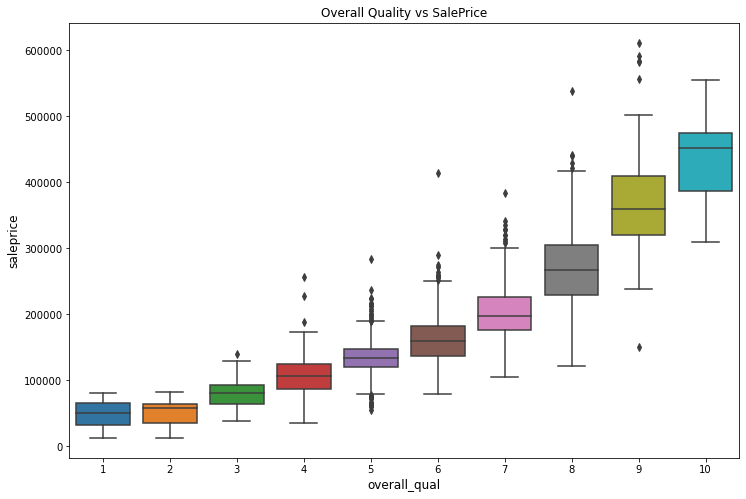

In [755]:
#look at the boxplot of overall quality vs saleprice again
plot_boxplot(house_train, 'overall_qual', 'saleprice', 'Overall Quality vs SalePrice')

Looking at the boxplot above, there is obvious trend in which when the overall quality of a house increase, the saleprice of the house also increases. This definitely explains the high correlation of 0.804 for overall quality against saleprice. Hence, this shows that the overall quality of a house has a very strong relationship with the sale price of a house.

#### Grade Living Area, Total Basement Square Feet

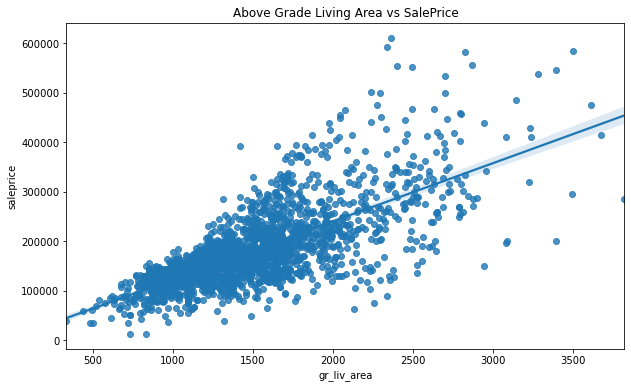

In [756]:
#plot above grade living area vs sale price
reg_plot(house_train, 'gr_liv_area', 'saleprice', 'Above Grade Living Area vs SalePrice')

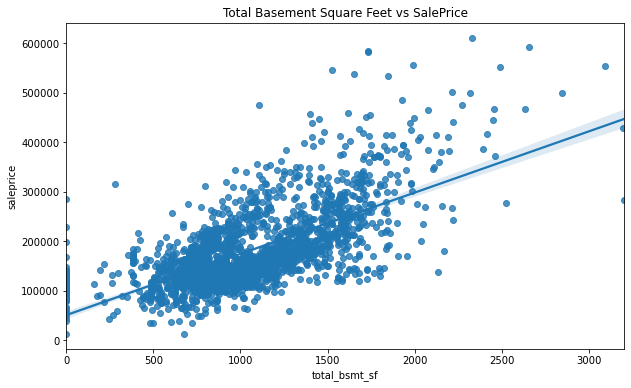

In [757]:
#plot total basement square feet vs sale price
reg_plot(house_train, 'total_bsmt_sf', 'saleprice', 'Total Basement Square Feet vs SalePrice')

Since both above grade living area and total basement square feet refers to the area available for living in a house listing, I decided to analyse both features together. Looking at both scatterplots above, it appears that when the grade living area of a listing increases, the saleprice of a listing tends to increase as well. Likewise, the saleprice of a house also tends to increases as the total basement square feet of a house increases. 

This is evident by both variables' moderate to high correlation with saleprice, with a high correlation of 0.719 for grade living area and a moderate to high correlation of 0.665 for the total basement square feet of a house.
Hence, both features (which are related to the total area of a house) can influence the sale price of a house, and could be useful in house prices prediction.

#### Garage Area

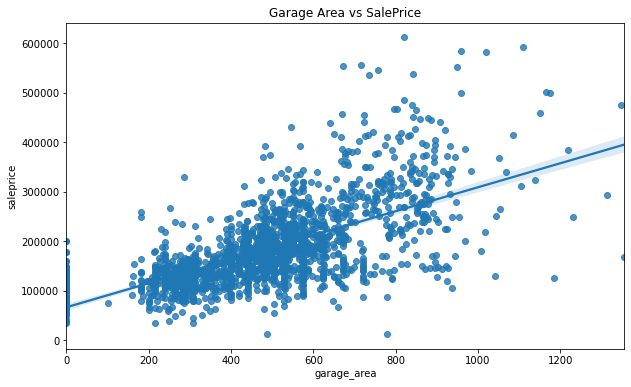

In [758]:
#plot garage area vs sale price
reg_plot(house_train, 'garage_area', 'saleprice', 'Garage Area vs SalePrice')

Here, we have another area-related feature that is plotted against saleprice. With a correlation of 0.656 against saleprice, this moderate to high correlation is shown on the scatterplot above, with saleprice increasing as the garage area of a listing increase. Hence, it is evident that the garage area of a house can also have a positive impact on the saleprice of a listing due to its moderate to strong relationship with saleprice.

#### Enclosed porch

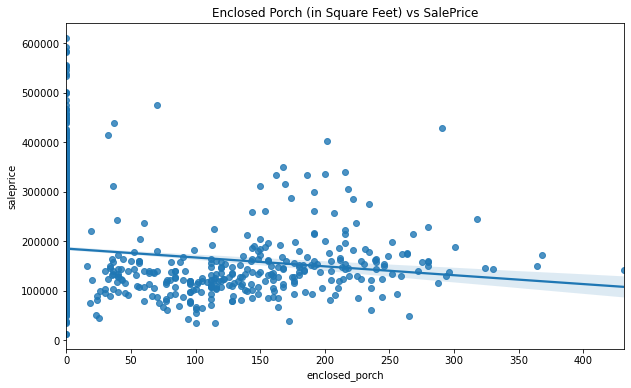

In [759]:
#plot enclosed porch area (square feet) vs sale price
reg_plot(house_train, 'enclosed_porch', 'saleprice', 'Enclosed Porch (in Square Feet) vs SalePrice')

We decided to look at the highest negatively correlated variable with saleprice, which is the total enclosed porch area (square feet) of a listing against its saleprice. Looking at the scatter plot, it appears that there isn't a strong relationship between the enclosed porch's total area and the saleprice, judging by the almost flat line. This definitely corresponds with its low negative correlation of -0.135 against saleprice. Hence, the total enclosed porch area of a listing does not have a strong relationship with the sale price of a house.

Based on all the analysis above, it can be seen before modelling that there are several variables that influence house prices and can be used in the prediction of sale prices, specifically overall quality, living area, basement area and garage area of a house. However, it will still be hard to predict accurate sale prices using only these variables due to higher potential bias. 

Hence, we still need to use the other available features from the dataset to predict more prices and prevent high potential bias (and low variance). To select suitable features for our model, the process will be done in the later section under [Feature Engineering and Feature Selection](#Feature-Engineering-and-Feature-Selection).


### Summary Statistics

In [761]:
#show summary statistics of house_train
house_train.describe()

,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,...,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,saleprice
count,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,...,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000,2045.000000
mean,69.650367,9892.276773,6.108068,5.561369,1971.710024,1984.128606,97.525672,437.248411,48.076284,567.555012,...,1.775550,472.773594,93.466504,47.245477,22.534474,2.599022,16.559902,2.170171,43.168215,181358.728117
std,21.334020,5227.174327,1.422684,1.104950,30.178959,21.035465,171.786717,439.889080,165.185518,445.366536,...,0.764929,214.568956,128.118736,65.896077,59.775808,25.266226,57.451366,36.332496,434.785748,79286.272099
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,60.000000,7500.000000,5.000000,5.000000,1953.000000,1964.000000,0.000000,0.000000,0.000000,220.000000,...,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129500.000000
50%,69.000000,9400.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,475.000000,...,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,162500.000000
75%,80.000000,11500.000000,7.000000,6.000000,2001.000000,2004.000000,158.000000,733.000000,0.000000,811.000000,...,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,200.000000,70761.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,1474.000000,2336.000000,...,5.000000,1356.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,12500.000000,611657.000000


As seen from the summary statistics above, the scale of each variable from the house_train dataset varies drastically from variable to variable. With this in mind, standardisation will definitely be required for modelling.

### Distribution of variables

#### Saleprice

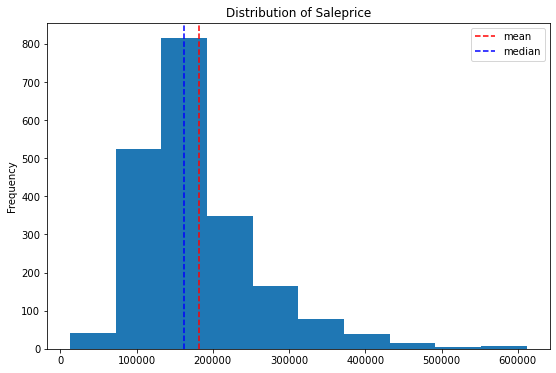

In [762]:
#plotting distribution of saleprice
plt.figure(figsize=(9,6))
plt.hist(house_train['saleprice'])
plt.title('Distribution of Saleprice')
plt.ylabel('Frequency')

#draw line showing mean
plt.axvline(house_train['saleprice'].mean(), linestyle = '--', color = 'r', label ='mean')
#draw line showing median
plt.axvline(house_train['saleprice'].median(), linestyle = '--', color = 'b', label ='median')
plt.legend()

As seen by the distribution plot above, the saleprice distribution has a right-skew.

#### Other Numerical Variables

In [763]:
#function to plot histogram to check for distribution
def plot_histogram(dataframe, columns, num_cols):
    fig = plt.figure(figsize=(12*num_cols,9*round(len(columns)/num_cols)))
    for col_number, col_name in enumerate(columns):   
        fig.add_subplot(math.ceil(len(columns)/num_cols), num_cols, col_number + 1)
        plt.hist(dataframe[col_name])
        plt.axvline(dataframe[col_name].mean(), linestyle = '--', color = 'r', label ='mean')
        plt.axvline(dataframe[col_name].median(), linestyle = '--', color = 'b', label ='median')
        plt.xlabel(col_name, fontsize = 15)
        plt.ylabel('Frequency', fontsize = 15)
       

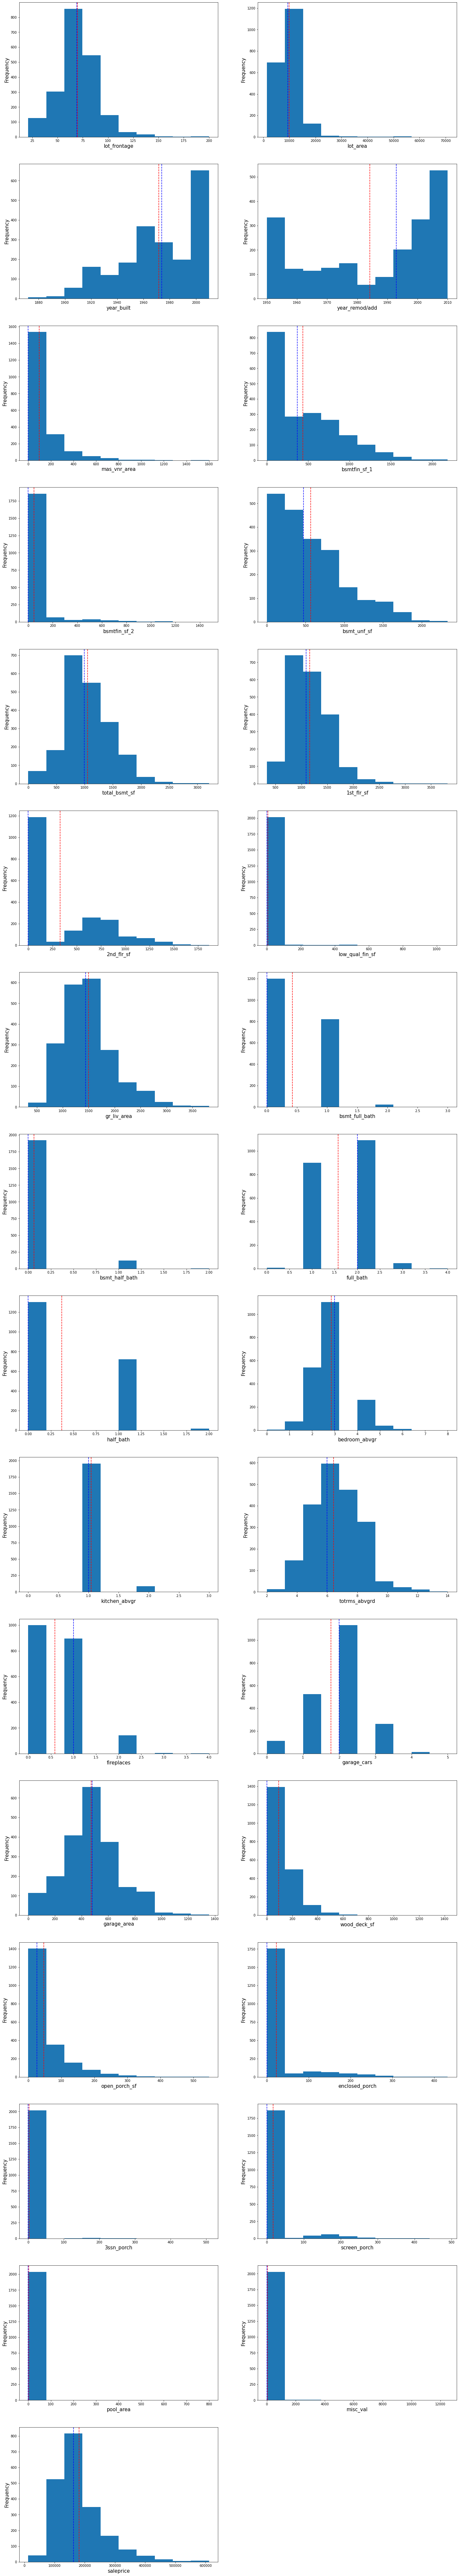

In [764]:
#plotting all numerical variables to check their distribution
plot_histogram(house_train, numerical_columns, 2)

Looking at the histograms, it appears that many numerical variables are also skewed (and has less of a normal distribution), with more variables being right-skewed.

Just a quick comparison of the variables' distribution and summary statistics show us that the variables vary a lot in scale. Hence, the variables from the dataset definitely need to be transformed (through standardisation) for modelling. Standardisation of the variables (except for our one hot encoded/dummy variables created in the [Dummy Variables/One-Hot Encoding](#Dummy-Variables/One-Hot-Encoding) section) will be executed in the modelling section.

## Encoding

### Label Encoding

Label Encoding will be done for all ordinal variables of the train and test dataset.

In [765]:
#combine all columns of object type
categorical = house_train.select_dtypes(include=['object']).columns.tolist()

In [766]:
#combine all categorical columns together (including the 5 not_numerical variables)
categorical_columns = categorical
[categorical_columns.append(x) for x in not_numerical if x not in categorical_columns]

[None, None]

In [767]:
#number of unique variables of each column for both train and test datasets
for x in categorical_columns:
    unique_value_train = house_train[x].nunique()
    unique_column = x
    unique_value_test = house_test[x].nunique()
    print(f"{unique_column}: train ({unique_value_train}), test ({unique_value_test})")

ms_subclass: train (16), test (15)
ms_zoning: train (7), test (6)
street: train (2), test (2)
alley: train (3), test (3)
lot_shape: train (4), test (4)
land_contour: train (4), test (4)
utilities: train (3), test (2)
lot_config: train (5), test (5)
land_slope: train (3), test (3)
neighborhood: train (28), test (26)
condition_1: train (9), test (9)
condition_2: train (8), test (4)
bldg_type: train (5), test (5)
house_style: train (8), test (8)
roof_style: train (6), test (6)
roof_matl: train (5), test (6)
exterior_1st: train (15), test (13)
exterior_2nd: train (15), test (16)
mas_vnr_type: train (4), test (5)
exter_qual: train (4), test (4)
exter_cond: train (5), test (5)
foundation: train (6), test (6)
bsmt_qual: train (6), test (6)
bsmt_cond: train (6), test (4)
bsmt_exposure: train (5), test (5)
bsmtfin_type_1: train (7), test (7)
bsmtfin_type_2: train (7), test (7)
heating: train (5), test (4)
heating_qc: train (5), test (4)
central_air: train (2), test (2)
electrical: train (5), te

As seen above when comparing the number of unique variables for each column from both train and test datasets, the number of unique variables differs for each categorical column. 

Hence, the <b>test and train dataset will first need to be combined</b> to execute label encoding and also create dummy variables/one hot encoding, before splitting them up again to their original train and test datasets.

In [768]:
#merge both train and test datasets first to execute label and one hot/dummy encoding
merged_house = pd.concat([house_train, house_test], axis = 0)

Label Encoding will be done in groups for easy reference. Two ordinal variables, 'overall_qual' and 'overall_cond', will not be label encoded since they are already encoded in the original dataset.

In [769]:
#replace basement ordinal variables with ranked values
merged_house['bsmt_qual'].replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
merged_house['bsmt_cond'].replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
merged_house['bsmt_exposure'].replace(to_replace = ['None', 'No', 'Mn', 'Av', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
merged_house['bsmtfin_type_1'].replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
merged_house['bsmtfin_type_2'].replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)


In [770]:
#replace garage ordinal variables with ranked values
merged_house['garage_finish'].replace(to_replace =  ['None', 'Unf', 'RFn', 'Fin'], value = [0, 1, 2, 3], inplace = True)
merged_house['garage_qual'].replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
merged_house['garage_cond'].replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)

In [771]:
#replace all other ordinal variables with ranked values
merged_house['lot_shape'].replace(to_replace = ['IR3', 'IR2', 'IR1', 'Reg'], value = [0, 1, 2, 3], inplace = True)
merged_house['utilities'].replace(to_replace = ['ELO','NoSeWa','NoSewr', 'AllPub'], value = [0, 1, 2, 3], inplace = True)
merged_house['land_slope'].replace(to_replace = ['Sev', 'Mod', 'Gtl'], value = [0, 1, 2], inplace = True)
merged_house['exter_qual'].replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
merged_house['exter_cond'].replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
merged_house['heating_qc'].replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
merged_house['electrical'].replace(to_replace = ['FuseP', 'FuseF', 'Mix', 'FuseA', 'SBrkr'], value = [0, 1, 2, 3, 4], inplace = True)
merged_house['kitchen_qual'].replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
merged_house['functional'].replace(to_replace = ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], value = [0, 1, 2, 3, 4, 5, 6, 7], inplace = True)
merged_house['fireplace_qu'].replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
merged_house['paved_drive'].replace(to_replace =  ['N', 'P', 'Y'], value = [0, 1, 2], inplace = True)
merged_house['pool_qc'].replace(to_replace =  ['None', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
merged_house['fence'].replace(to_replace =  ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], value = [0, 1, 2, 3, 4], inplace = True)

### Dummy Variables/One-Hot Encoding

In [772]:
#combine all nominal variables
nominal_variables=['ms_subclass', 'ms_zoning', 'street', 'alley', 'land_contour', 'lot_config', 'neighborhood', 
                   'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 
                   'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'foundation', 'heating', 
                   'central_air', 'garage_type', 'misc_feature', 'sale_type', 'mo_sold', 'yr_sold']

In [773]:
#for usage in standardisation section (under modelling) later
all_except_nominal = [x for x in merged_house.columns if x not in nominal_variables]

In [774]:
#create dummies for all nominal variables
merged_house = pd.get_dummies(merged_house, columns = nominal_variables)

In [775]:
#remove any duplicated columns
merged_house = merged_house.loc[:, ~merged_house.columns.duplicated()]

In [776]:
#to get the position for slicing merged_house to our train and test datasets
house_train.shape

(2045, 78)

In [777]:
#split them back to train and test datasets
model_house_train = merged_house.iloc[:2045, :]
model_house_test = merged_house.iloc[2045:, :]

In [778]:
#setting all datasets as new objects/views instead of copies
#this is to prevent any future errors related to copies and views from pandas
model_house_train = model_house_train.copy(deep=True)
model_house_test = model_house_test.copy(deep=True)

In [779]:
#drop saleprice column from model_house_test
model_house_test.drop(columns = ['saleprice'], axis = 1, inplace=True)

In [780]:
#verify whether test has one less column than train
#also verify train set has the right number of rows
model_house_train.shape, model_house_test.shape

((2045, 253), (879, 252))

## Feature Engineering and Feature Selection


In [781]:
#variables with higher correlation (in absolute values) with saleprice
np.abs(model_house_train.corr()[['saleprice']].sort_values('saleprice', ascending=False)).head(11)

,saleprice
saleprice,1.000000
overall_qual,0.803819
gr_liv_area,0.719374
exter_qual,0.716308
kitchen_qual,0.694312
total_bsmt_sf,0.665280
garage_area,0.655706
garage_cars,0.648897
1st_flr_sf,0.647755
bsmt_qual,0.613242


With both 'total_bsmt_sf' and '1st_flr_sf' in the top 15 for highest positive correlation with saleprice, a new column can be added that involves the total square feet available in a listing.

In [782]:
#New column on total combined square feet
model_house_train['total_sf'] = model_house_train['total_bsmt_sf'] + model_house_train['1st_flr_sf'] + model_house_train['2nd_flr_sf']

With the new column created for total_sf, the individual columns used in these new columns should be dropped to avoid collinearity. These columns used will be dropped later in the section under [Dropping all required variables](#Dropping-all-required-variables).

#### Adding the same columns to test data set

In [783]:
#add the same new column, total_sf, to the test dataset
model_house_test['total_sf'] = model_house_test['total_bsmt_sf'] + model_house_test['1st_flr_sf'] + model_house_test['2nd_flr_sf']

### More Feature Selection

While calculating the correlation of each variable with saleprice, there are several variables found with NaN correlation. On further research, these NaN values mean that the values from these columns do not vary enough to have a correlation calculated <sup>[[1]](https://stackoverflow.com/questions/22655667/dataframe-correlation-produces-nan-although-its-values-are-all-integers)</sup>. This means that these columns' values are not substantial enough and hence will be dropped in the section under [Dropping all required variables](#Dropping-all-required-variables).

In [784]:
#group variables with NaN correlation
corr_house_train = model_house_train.corr()['saleprice']
null_corr = corr_house_train[corr_house_train.isnull() == True]
null_corr

roof_matl_Metal        NaN
roof_matl_Roll         NaN
exterior_1st_PreCast   NaN
exterior_2nd_Other     NaN
exterior_2nd_PreCast   NaN
mas_vnr_type_CBlock    NaN
heating_Floor          NaN
sale_type_VWD          NaN
Name: saleprice, dtype: float64

In [785]:
#combine all null correlation columns to drop later
list_of_null = []
[list_of_null.append(column) for column, value in null_corr.items()]
list_of_null

['roof_matl_Metal',
 'roof_matl_Roll',
 'exterior_1st_PreCast',
 'exterior_2nd_Other',
 'exterior_2nd_PreCast',
 'mas_vnr_type_CBlock',
 'heating_Floor',
 'sale_type_VWD']

#### Checking for Collinearity

Collinearity will be checked against variables that have high correlation with saleprice.

In [786]:
#top 5 variables with highest correlation with saleprice
np.abs(model_house_train.corr()[['saleprice']].sort_values('saleprice', ascending=False)).head(6)

,saleprice
saleprice,1.000000
total_sf,0.829802
overall_qual,0.803819
gr_liv_area,0.719374
exter_qual,0.716308
kitchen_qual,0.694312


The top 5 variables with the highest correlation against saleprice are total_sf, overall_qual, gr_liv_area, exter_qual, and kitchen_qual.

#### Overall_qual (with exter_qual and kitchen_qual)

In [787]:
#top 5 variables with highest correlation with overall_qual
np.abs(model_house_train.corr()[['overall_qual']].sort_values('overall_qual', ascending=False)).head(8)

,overall_qual
overall_qual,1.000000
saleprice,0.803819
exter_qual,0.739264
kitchen_qual,0.689330
total_sf,0.670637
bsmt_qual,0.653196
year_built,0.602512
garage_cars,0.587399


It seems like overall_qual has higher correlation with most quality-related variables. 
Even though overall quality usually includes the quality rating for external quality, kitchen quality and basement quality, however, these quality columns can still be independent from overall quality (e.g. a kitchen could be of very good quality while the overall quality of the house could be average). 
Hence, none of these quality columns will be dropped.

#### Total_sf

In [788]:
#top 5 variables with highest correlation with total_sf
np.abs(model_house_train.corr()[['total_sf']].sort_values('total_sf', ascending=False)).head(6)

,total_sf
total_sf,1.000000
gr_liv_area,0.855795
saleprice,0.829802
total_bsmt_sf,0.819307
1st_flr_sf,0.778372
overall_qual,0.670637


#### Gr_liv_area

In [789]:
#top 5 variables with highest correlation with overall_qual
np.abs(model_house_train.corr()[['gr_liv_area']].sort_values('gr_liv_area', ascending=False)).head(6)

,gr_liv_area
gr_liv_area,1.000000
total_sf,0.855795
totrms_abvgrd,0.812903
saleprice,0.719374
2nd_flr_sf,0.656808
full_bath,0.629999


Looking at the top 5 highest correlated variables from both gr_liv_area and total_sf, both variables are highly correlated with one another, with a highly correlation score of 0.856.
Since gr_liv_area is essentially the total living area for a listing, this is similar to the value of total_sf (which adds up the living area of a listing). 
According to the exploratory data analysis above, gr_liv_area is considered a strong determinant of house prices. However, since both variables are very similar to each other, only one of these variables should be kept to avoid multicollinearity.

Hence, gr_liv_area will be dropped as it is almost like a duplicate of total_sf.

#### Close to Zero Correlation

Variables with almost close to 0 correlation with saleprice will also be dropped.

In [790]:
#delete variables that have close to 0 correlation with saleprice
#combine variables with 0 to 0.05 correlation with saleprice
positive_to_zero = corr_house_train[(corr_house_train > 0) & (corr_house_train < 0.05)]
list_of_zero = []

#add positive_to_zero variables under list_of_zero
[list_of_zero.append(column) for column, value in positive_to_zero.items()]

#combine variables with 0 to -0.05 correlation with saleprice
negative_to_zero = corr_house_train[(corr_house_train < 0) & (corr_house_train > -0.05)]

#add negative_to_zero variables under list_of_zero
[list_of_zero.append(column) for column, value in negative_to_zero.items()]
list_of_zero

['utilities',
 'exter_cond',
 'bsmtfin_type_2',
 'bsmtfin_sf_2',
 '3ssn_porch',
 'pool_area',
 'pool_qc',
 'ms_subclass_75',
 'land_contour_Low',
 'lot_config_FR3',
 'neighborhood_Blmngtn',
 'neighborhood_ClearCr',
 'neighborhood_Gilbert',
 'neighborhood_Greens',
 'neighborhood_GrnHill',
 'neighborhood_NWAmes',
 'neighborhood_SawyerW',
 'condition_1_RRNn',
 'condition_2_RRAe',
 'house_style_2.5Fin',
 'house_style_2.5Unf',
 'roof_style_Flat',
 'roof_style_Shed',
 'roof_matl_Membran',
 'roof_matl_Tar&Grv',
 'roof_matl_WdShake',
 'exterior_1st_BrkFace',
 'exterior_1st_ImStucc',
 'exterior_1st_Stone',
 'exterior_2nd_BrkFace',
 'exterior_2nd_ImStucc',
 'misc_feature_TenC',
 'sale_type_CWD',
 'sale_type_Con',
 'sale_type_ConLI',
 'mo_sold_1',
 'mo_sold_11',
 'mo_sold_12',
 'mo_sold_6',
 'mo_sold_7',
 'mo_sold_8',
 'mo_sold_9',
 'yr_sold_2007',
 'yr_sold_2008',
 'yr_sold_2009',
 'land_slope',
 'low_qual_fin_sf',
 'bsmt_half_bath',
 'misc_val',
 'ms_subclass_150',
 'ms_subclass_40',
 'ms_subcl

### Dropping selected variables

The following variables will be dropped:<br>
(1) Variables that were used to form the new 'total_sf' column <br>
(2) Variables with NaN correlation with saleprice <br>
(3) Variables with close to 0 correlation with saleprice<br>
(4) gr_liv_area

In [791]:
dropped_features = ['total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 
                    'gr_liv_area'] + list_of_null + list_of_zero

In [792]:
#drop all dropped_features columns from train set
model_house_train = model_house_train.drop(columns = dropped_features, axis = 1)

In [793]:
#drop all dropped_features columns from test set
model_house_test = model_house_test.drop(columns = dropped_features, axis = 1)

#### Last Check

In [794]:
#check both dataset's shape
model_house_train.shape, model_house_test.shape

((2045, 144), (879, 143))

In [795]:
#convert all to integers in train set
model_house_train = model_house_train.astype('int')

In [796]:
#check that all columns in train is in numeric types
model_house_train.dtypes.value_counts()

int64    144
dtype: int64

In [797]:
#also convert all to integers in test set
model_house_test = model_house_test.astype('int')

In [798]:
#check that all columns in test is in numeric types
model_house_test.dtypes.value_counts()

int64    143
dtype: int64

## Modelling

### Pre-scaling Regression

In [799]:
features = [x for x in model_house_train.columns if x not in ['saleprice']]

X = model_house_train[features]
y = model_house_train.saleprice

lr = LinearRegression()

lr.fit(X,y)
lr.score(X, y)

0.9243284942676797

There is a baseline score of 92.43% without any scaling done to the model.

### Train/test Splits

In [800]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Standardise

We will standardise on all variables except dummy/one-hot encoded variables, as we do not want to assign a distribution to these nominal variables<sup>[[2]](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)</sup>.

In [801]:
#remove deleted columns (dropped_features) from all_except_nominal list

[all_except_nominal.remove(x) for x in dropped_features if x in all_except_nominal]
all_except_nominal

['lot_frontage',
 'lot_area',
 'lot_shape',
 'overall_qual',
 'overall_cond',
 'year_built',
 'year_remod/add',
 'mas_vnr_area',
 'exter_qual',
 'bsmt_qual',
 'bsmt_cond',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_sf_1',
 'bsmt_unf_sf',
 'heating_qc',
 'electrical',
 'bsmt_full_bath',
 'full_bath',
 'half_bath',
 'bedroom_abvgr',
 'kitchen_abvgr',
 'kitchen_qual',
 'totrms_abvgrd',
 'functional',
 'fireplaces',
 'fireplace_qu',
 'garage_finish',
 'garage_cars',
 'garage_area',
 'garage_qual',
 'garage_cond',
 'paved_drive',
 'wood_deck_sf',
 'open_porch_sf',
 'enclosed_porch',
 'screen_porch',
 'fence',
 'saleprice']

In [802]:
#Standardise X_train and X_test, and our model_house_test dataset

#copy of cross_validation datasets
X_train_ss = X_train.copy()
X_test_ss = X_test.copy()
house_test_stand = model_house_test.copy()

#To standardise all variables (excluding nominal variables (dummy variables), and saleprice)
all_except_nominal.remove('saleprice')

#apply standardization on all features except nominal
for i in all_except_nominal:
    
    #initialise StandardScalar
    scale = StandardScaler()
    
    #fit and transform the training data
    X_train_ss[i] = scale.fit_transform(X_train_ss[[i]])
    
    #transform the testing data
    X_test_ss[i] = scale.transform(X_test_ss[[i]])
    
    #transform on original test data
    house_test_stand[i] = scale.transform(house_test_stand[[i]])

### Post-Scaling Regression

In [803]:
lr = LinearRegression()
lr.fit(X_train_ss, y_train)
lr.score(X_train_ss, y_train), lr.score(X_test_ss, y_test)

(0.9273217317956038, 0.9036397247110075)

The model.score returns the $R^2$/coefficient of determination for the model and predicts the amount of variance in the data.
With a score of 92.73% for the score of the train set and a 90.36% for the test set, this means both datasets experience a 2.37% difference in variance.

#### Root Mean Squared Error
The root mean squared error is the square root of the average of the squared errors (i.e. the difference between each prediction and the actual values of home prices).

In [804]:
#RMSE for both train and test
display(np.sqrt(mean_squared_error(y_train, lr.predict(X_train_ss))),
        np.sqrt(mean_squared_error(y_test, lr.predict(X_test_ss))))

21476.075170465756

24292.95951794988

In [805]:
#Difference in RMSE
np.sqrt(mean_squared_error(y_train, lr.predict(X_train_ss))) - np.sqrt(mean_squared_error(y_test, lr.predict(X_test_ss)))

-2816.8843474841233

The root mean squared error differs with an error of 2817 between the train and test dataset.

### K-Folds Cross Validation

In [806]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
score_train = cross_val_score(lr, X_train_ss, y_train, cv=kf) 
score_test = cross_val_score(lr, X_test_ss, y_test, cv=kf) 

In [807]:
#r2 score (average and std) for X_train_ss/y_train set
score_train.mean(), score_train.std()

(0.901388295110691, 0.015938940695512455)

In [808]:
#r2 score (average and std) for X_test_ss/y_test set
score_test.mean(), score_test.std()

(0.881108722051405, 0.016154684532976565)

Looking at both scores from both train and test datasets, the scores do not differ much in variance, as evident by a slight 2.03% difference in variance between both scores.

### Regression with Ridge

In [809]:
r_alphas = np.linspace(5, 7, 100)
ridge_model = RidgeCV(alphas=r_alphas, cv=kf)
ridge_model = ridge_model.fit(X_train_ss, y_train)

#to check optimal alpha
ridge_optimal_alpha = ridge_model.alpha_
ridge_optimal_alpha

5.94949494949495

In [810]:
#score for both splitted train and test dataset
ridge_model.score(X_train_ss, y_train), ridge_model.score(X_test_ss, y_test)

(0.9248653450659403, 0.9093176942401101)

The scores after using ridge only differs slightly from the post-scaling regression's score. However, the difference in variance after using ridge is smaller, with only a small 1.6% difference in variance between both scores from the train and test dataset.

In [811]:
#RMSE for both splitted train and test dataset
display(np.sqrt(mean_squared_error(y_train, ridge_model.predict(X_train_ss))),
        np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test_ss))))

21835.984550744543

23566.369762110713

In [812]:
#Difference in RMSE
np.sqrt(mean_squared_error(y_train, ridge_model.predict(X_train_ss))) - np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test_ss)))

-1730.3852113661706

The ridge's RMSE also only differs slightly from the post-scaling regression's RMSE. However, the difference in the RMSE is smaller as compared to post-scaling regression, with ridge's RMSE difference between both datasets boasting only an error difference of 1730.

### Regression with Lasso


In [813]:
alphas = np.linspace(90, 95, 100)
lasso_model = LassoCV(alphas=alphas, cv=kf)
lasso_model = lasso_model.fit(X_train_ss, y_train)

#to check lasso optimal alpha
lasso_optimal_alpha = lasso_model.alpha_
lasso_optimal_alpha

92.57575757575758

In [814]:
#score for splitted train and test dataset
lasso_model.score(X_train_ss, y_train), lasso_model.score(X_test_ss, y_test)

(0.9214791929965651, 0.9091528828915072)

Lasso's score is comparable to Ridge's scores, but this model has a very slight decrease in variance as compared to Ridge, with Lasso boasting a small difference of only 1.2% in variance.

In [815]:
#RMSE for both splitted train and test dataset
display(np.sqrt(mean_squared_error(y_train, lasso_model.predict(X_train_ss))),
        np.sqrt(mean_squared_error(y_test, lasso_model.predict(X_test_ss))))

22322.611837955326

23587.775492791658

In [816]:
#Difference in RMSE
np.sqrt(mean_squared_error(y_train, lasso_model.predict(X_train_ss))) - np.sqrt(mean_squared_error(y_test, lasso_model.predict(X_test_ss)))

-1265.1636548363313

Lasso's RMSE scores are also comparable to Ridge's scores, though Lasso's RMSE difference in scores (1265) between both datasets is lower than Ridge's RMSE difference (1730).

### Regression with ElasticNet


In [817]:
#Setup the hyperparameter grid
param_grid = {'alpha': np.linspace(1, 10, 200), 
              'l1_ratio': np.arange(0.001, 1, 25),
              'random_state': [42]}

#Instantiate ElasticNet
enet = ElasticNet()

#Instantiate the GridSearchCV object: enet_model
enet_model = GridSearchCV(enet, param_grid, cv=kf)

#Fit it to the data
enet_model.fit(X_train_ss, y_train)

#score for both train and test
enet_model.score(X_train_ss, y_train), enet_model.score(X_test_ss, y_test)

(0.8778662501109982, 0.8638836772922562)

As compared to Ridge and Lasso, ElasticNet has the lowest score. However, its difference in variance is comparable to Ridge and Lasso, with both scores from the train and test dataset having a difference of 1.4% in variance.

In [818]:
#RMSE for both splitted train and test dataset
display(np.sqrt(mean_squared_error(y_train, enet_model.predict(X_train_ss))),
        np.sqrt(mean_squared_error(y_test, enet_model.predict(X_test_ss))))

27840.079814813223

28872.64122646718

In [819]:
#Difference in RMSE
np.sqrt(mean_squared_error(y_train, enet_model.predict(X_train_ss))) - np.sqrt(mean_squared_error(y_test, enet_model.predict(X_test_ss)))

-1032.5614116539582

ElasticNet's RMSE scores are the highest among all three regression models. However, the difference in RMSE between both train and test datasets using ElasticNet is the lowest at 1033.

## Selection of Model

| Model | $R^2$ (train)  | $R^2$ (test) | $R^2$ difference | RMSE (train)   | RMSE (test) | RMSE difference
|-------|--------------- |------------  |----------------- |--------------- |-------------|-------------|
| Linear Regression (post standardisation) 	    | 0.927    | 0.904 | 0.024  | 21476  |24292 | 2817 |
| Ridge (L2 penalty)                    	    | 0.925    | 0.909 | 0.016	| 21836  |23566 | 1730 |
| Lasso (L1 penalty)                    	    | 0.921    | 0.909 | 0.012	| 22322  |23588 | 1265 |
| Elastic Net                           	    | 0.878    | 0.864 | 0.014 	| 27840  |28872 | 1033 |

Comparing the three models (excluding raw linear regression model), since Ridge has comparable $R^2$ score to Lasso and the lowest RMSE for both train and test dataset, we have decided to use the Ridge model to predict house prices.

## Interpretation of Chosen Model

The ridge model is usually used to address overfitting issues, and most importantly, multicollinearity. By adding a degree of bias to the regression estimates, the ridge regression reduces the standard errors that can occur when multicollinearity can occur.

### Residuals

Text(0.5, 1.0, 'Comparing Predicted Prices with Residuals')

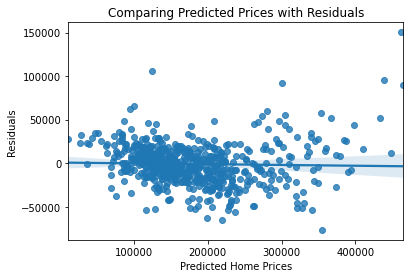

In [820]:
#comparing the predicted prices of X_test_ss against residuals
predictions = ridge_model.predict(X_test_ss)
residuals = y_test - predictions

sns.regplot(predictions, residuals)
plt.xlabel('Predicted Home Prices')
plt.ylabel('Residuals')
plt.title('Comparing Predicted Prices with Residuals')

Looking at the scatterplot above, it seems that our model has lots of residuals that are clustered near residual values of -50000 to 50000, with many residuals plotted near 0 (which means price predictions are nearly correct).

### Intercept

In [821]:
ridge_model.intercept_

42635.49532305973

With an intercept value of 42,635, this means that if all features in our model are reduced to zero, the home would cost a minimum of 42,635 dollars. Each feature will either add or decrease this value, which leads us to the predicted saleprice of a house. Let's study the coefficients of our variables to evaluate the impact certain variables have on the saleprice of a house.

In [822]:
#Find the coefficients for each feature/variable
#make it into a dataframe
ridge_coef = pd.DataFrame([ridge_model.coef_, X.columns], index = ['coefficients', 'features']).T

#### Highest Positive Coefficients

In [829]:
#show top 10 features with highest coefficients
highest_coeff = ridge_coef.sort_values('coefficients', ascending = False)[:10]
highest_coeff[['coefficients', 'features']]

,coefficients,features
77,31613.3,neighborhood_StoneBr
72,26443.9,neighborhood_NridgHt
84,19288.1,condition_1_PosN
71,19066.7,neighborhood_NoRidge
100,15449.9,roof_matl_WdShngl
59,14894,land_contour_HLS
134,13146.2,garage_type_None
3,12186.2,overall_qual
139,11535,sale_type_New
98,11411.2,roof_style_Hip


Text(0, 0.5, 'Columns/Variables')

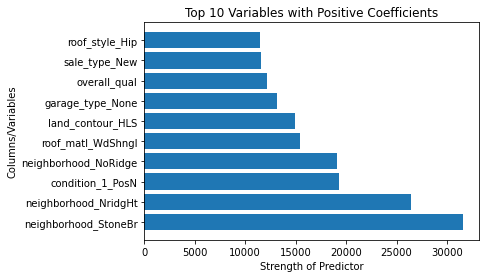

In [830]:
#plot top 10 variables with positive coefficients
plt.barh(highest_coeff['features'][:10], highest_coeff['coefficients'][0:10])
plt.title('Top 10 Variables with Positive Coefficients')
plt.xlabel('Strength of Predictor')
plt.ylabel('Columns/Variables')

The top 10 variables with the highest positive coefficients have the highest impact on increasing the sale price of a listing.
Among the top 10 variables, 3 of the variables belongs to the neighbourhood/location category, with all 3 neighbourhood related variables (Stone Bridge, Northridge Heights and Northridge neighbourhoods) being in the top 4. This highly means that these three neighbourhoods are located in affluent or central areas, and hence any listing sold at these locations will strongly increase the price of the housing. For example, if a listing is located at the neighbourhood of Stone Brook, its housing predicted price will increase by 31613 dollars.

Just like our analysis above under the section [Highly Correlated Variables with Saleprice](#Highly-Correlated-Variables-with-Saleprice), the overall quality of a listing has a profound impact on the saleprice of a listing. With a high coefficient of 12186, this means that with every-point increase in overall quality, the predicted price of the listing will increase by 12186 dollars.

Interesting variables that were also included in the top 10 were exterior-related variables: a 'hip' roof style variable and a 'Wood Shingles' roof material variable. Houses with either of these two roof styles or materials are usually more durable and can maintain their quality for a longer period, since hip roofs and Wood Shingles roofs are known to be more durable<sup>[[3]](https://www.roofcostestimator.com/top-15-roof-types-and-their-pros-cons/#:~:text=Pros%3A%20Hip%20roofs%20are%20more,off%20with%20no%20standing%20water.)</sup> and strong<sup>[[4]](https://www.customshingles.com/the-longevity-of-wood-shingles#:~:text=Yes%2C%20wood%20shingles%20are%20strong,storms%20or%20other%20natural%20events.)</sup>. Since higher quality houses are sold for more, this explains why certain roof and material exterior-related variables can help to increase the value of a house. Hence, this shows why certain exterior-related variables can be major contributing factors to saleprice.

Lastly, if the home is newly constructed and sold (under the variable sale_type_New), this will obviously positively impact the price of a listing since new houses will usually be sold for more. With a coefficient of 11535, selling a newly constructed home will increase the predicted price of a listing by 11535 dollars.

#### Highest Negative Coefficients

In [831]:
#show top 10 features with highest negative coefficients (negative values)
lowest_coeff = ridge_coef.sort_values('coefficients', ascending = True)[0:10]
lowest_coeff[['coefficients', 'features']]

,coefficients,features
137,-9810.23,sale_type_COD
108,-9208.46,exterior_2nd_AsbShng
14,-8533.05,bsmt_unf_sf
50,-7875.95,ms_zoning_C (all)
107,-7699.33,exterior_1st_Wd Sdng
121,-7287.6,foundation_CBlock
140,-6867.78,sale_type_WD
96,-6155.27,house_style_SFoyer
85,-5797.47,condition_1_RRAe
38,-5517.37,ms_subclass_120


When comparing both the negative and positive coefficients, the values of the negative coefficients are not as high the positive coefficients. It also looks like the highest positive and negative coefficients are mostly from categorical variables.

Text(0, 0.5, 'Columns/Variables')

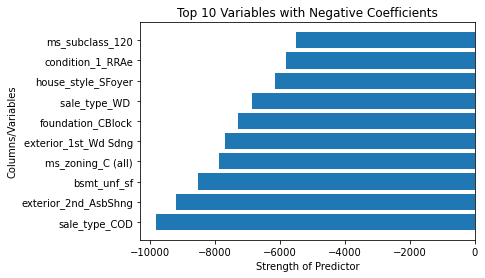

In [832]:
#plot top 10 variables with negative coefficients
plt.barh(lowest_coeff['features'][:10], lowest_coeff['coefficients'][0:10])
plt.title('Top 10 Variables with Negative Coefficients')
plt.xlabel('Strength of Predictor')
plt.ylabel('Columns/Variables')

Among the top 10 variables with negative coefficients, two of the variables are sale-type related. For example, a housing with Court Officer Deed/Estate (COD) sale type will negatively impact the saleprice of a housing by a predicted value of -9810. With 1 and 2 sale-type related variables being in the top 10 variables with positive coefficients and negative coeffcients respectively, this means that the sale type of a housing does have quite a strong impact on housing prices.

Another variable that stood out within the top 10 is the basement unfinished square feet (bsmt_unf_sf), which refers to the unfinished square feet of basement area in a listing. With a negative coefficient of 8533, this means that with every 1 square feet increase in unfinished basement of a listing, this decreases the predicted house price by 8533 dollars. This highly means that any unfinished works in a listing (in this particular case, the basement) negatively affects the saleprice of a house.

Once again, the location of the house listing also affects the saleprice, this time negatively with the condition_1_RRAe variable, which refers to houses that are located adjacent to the East-West railroad. With a negative coefficient of 5797, a house being located adjacent to a railroad will decease the predicted house price by 5797 dollars. Since railroads can be noisy, this certainly explains why certain location variables, such as this particular feature, can negatively impact the sale price of a house.

Similar to the top 10 variables with positive coefficients, there are also several exterior-related variables with higher negative coefficients, namely the 'Split Foyer' house style, 'Wood Siding' first exterior material, and 'Asbestos Shingles' second exterior material. Any of these exterior-related variables will have a negative impact on sale prices of housing; for example a house having 'Aesbestos Shingles' for its second exterior material will decrease its predicted house price by 9208 dollars, and this can be explained by the banned usage of Aesbestos as a house exterior material since the 1970s due to its possible negative side effects to health<sup>[[5]](http://www.ehso.com/asbestoshomeshingles.php)</sup>.

### Recommendations

The following features are important determinants in sale prices of houses:<br>
1. The location/neighbourhood that the house is located at<br>
2. The sale type of the house<br>
3. The total area of the house<br>
4. The overall quality of the house (which also includes the total unfinished areas of the house)<br>
5. The exterior of the house (includes the exterior roof, material and style of the house)<br>

To increase the value of homes, the following can be done:
1. Improve the overall quality of the whole house, since overall quality highly affects the sale price of a house. Renovations can be done to the house to help improve overall quality of a home.<br>
2. Any unfinished areas in a house, particularly the basement, must be dealt with, especially since any unfinished square footage reduces the value of a house.<br>
3. Improve the exterior of the house, particularly the roof style and material of the house (in particular, to hip style and wood shingles).

If clients are interested in investing in real estate, the following areas can be considered due to its high positive impact on sales prices:
1. Stone Brook<br>
2. Northridge Heights<br>
3. Northridge<br>

## Predictions for Kaggle

In [833]:
#predicting values using the standardised house_test set
y_pred = ridge_model.predict(house_test_stand)
y_pred.mean()

181641.73359257472

In [834]:
submission = pd.DataFrame(y_pred, columns=['SalePrice'])
#insert ID column
submission['Id'] = test['id']
submission = submission[['Id', 'SalePrice']]

In [835]:
submission.head()

,Id,SalePrice
0,2658,146573.912139
1,2718,157993.971664
2,2414,220950.805909
3,1989,104607.100559
4,625,176936.367921


In [836]:
#write predictions to csv
submission.to_csv('./datasets/submission_kaggle_16_ridge.csv', index=False)


## Conclusion

After comparing the performance of all models, we decided to choose a ridge regression model for the prediction of housing sale prices due to its lower RMSE despite comparable $R^2$ score to other models. 
Through exploratory data analysis and the study of our coefficients generated by our model, we have found out that location of the housing, the quality of the housing, the sale type of the listing, the exterior of the house, and the total area (square feet) of the house are important determinants in the prediction of house prices in Ames. 
Paired with the knowledge of how these important features can impact housing prices, real estate agents can make use of the model to help their clients in the buying and selling of houses, providing them with predictions of prices and explaining what features will help their houses fetch better selling prices.

Moving forward, the model can be continuously improved by introducing more new data to it. As more houses get sold in Ames and more data is added, this will help to improve the model, hence getting better sale price predictions for real estate agents and their respective clients. 
In addition, more data of houses sold (features and its associated saleprice) from other cities in Iowa could also be added to the model so as to make the model more fitted to the entire state of Iowa, hence eventually making house price predictions for the state of Iowa in the future.

## Sources and References

1. https://stackoverflow.com/questions/22655667/dataframe-correlation-produces-nan-although-its-values-are-all-integers<br>
2. https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/<br>
3. https://www.roofcostestimator.com/top-15-roof-types-and-their-pros-cons/#:~:text=Pros%3A%20Hip%20roofs%20are%20more,off%20with%20no%20standing%20water.
4. https://www.customshingles.com/the-longevity-of-wood-shingles#:~:text=Yes%2C%20wood%20shingles%20are%20strong,storms%20or%20other%20natural%20events.
5. http://www.ehso.com/asbestoshomeshingles.php